In [0]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 3.7MB/s 
    100% |████████████████████████████████| 1.5MB 14.0MB/s 
    100% |████████████████████████████████| 184kB 28.0MB/s 
    100% |████████████████████████████████| 3.6MB 9.9MB/s 
    100% |████████████████████████████████| 2.2MB 15.5MB/s 
    100% |████████████████████████████████| 112kB 27.8MB/s 
    100% |████████████████████████████████| 496.4MB 29kB/s 
    100% |████████████████████████████████| 122kB 29.4MB/s 
    100% |████████████████████████████████| 61kB 24.1MB/s 
    100% |████████████████████████████████| 71kB 21.7MB/s 
    100% |████████████████████████████████| 92kB 27.8MB/s 
    100% |████████████████████████████████| 61kB 22.3MB/s 
    100% |████████████████████████████████| 122kB 28.3MB/s 
    100% |████████████████████████████████| 11.6MB 2.4MB/s 
    100% |████████████████████████████████| 81kB 26.1MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | /

In [0]:
!pip install torchtext==0.2.3

    100% |████████████████████████████████| 51kB 1.9MB/s 
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [0]:
!curl "https://download.pytorch.org/tutorial/hymenoptera_data.zip" --output hymenoptera_data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.0M  100 45.0M    0     0  32.9M      0  0:00:01  0:00:01 --:--:-- 32.9M


In [0]:
import zipfile

zip_ref = zipfile.ZipFile('hymenoptera_data.zip', 'r')
zip_ref.extractall('sample_data/data')
zip_ref.close()

In [0]:
import zipfile

zip_ref = zipfile.ZipFile('labels.csv.zip', 'r')
zip_ref.extractall('sample_data/dogbreed')
zip_ref.close()

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
PATH = 'sample_data/data/hymenoptera_data/'
sz = 224


In [0]:
torch.cuda.is_available()

True

In [0]:
torch.backends.cudnn.enabled

True

In [0]:
os.listdir(PATH)

['valid', 'train']

In [0]:
!mv sample_data/data/hymenoptera_data/val sample_data/data/hymenoptera_data/valid

In [0]:
os.listdir(f'{PATH}valid')

['ants', 'bees']

In [0]:
files = os.listdir(f'{PATH}valid/ants')[:5]
files

['562589509_7e55469b97.jpg',
 '8398478_50ef10c47a.jpg',
 '159515240_d5981e20d1.jpg',
 '2238242353_52c82441df.jpg',
 '1124525276_816a07c17f.jpg']

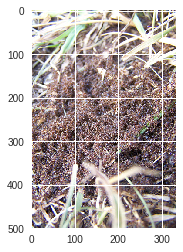

In [0]:
img = plt.imread(f'{PATH}valid/ants/{files[0]}')
plt.imshow(img);

In [0]:
img.shape

(500, 333, 3)

In [0]:
img[:4,:4]

array([[[248, 248, 194],
        [244, 250, 204],
        [245, 252, 218],
        [248, 252, 229]],

       [[187, 179, 114],
        [204, 197, 117],
        [219, 212, 122],
        [223, 218, 137]],

       [[ 92,  82, 117],
        [ 99,  89,  88],
        [117,  96,  67],
        [125, 101,  77]],

       [[162, 163, 207],
        [101, 116, 147],
        [ 76,  71, 101],
        [ 83,  57,  94]]], dtype=uint8)

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)



100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.683778   0.554182   0.686275  
    1      0.460949   0.214919   0.928105  



[array([0.21492]), 0.9281045716572431]

In [0]:
!rm -r  sample_data/data/hymenoptera_data/train/ants/.ipynb_checkpoints

In [0]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
data.classes

['ants', 'bees']

In [0]:
log_preds = learn.predict()
log_preds.shape

(153, 2)

In [0]:
log_preds[:10]

array([[-0.38981, -1.13067],
       [-0.49197, -0.94526],
       [-0.8031 , -0.5941 ],
       [-0.32672, -1.27756],
       [-0.02488, -3.70616],
       [-0.0534 , -2.95661],
       [-0.11049, -2.25756],
       [-1.13308, -0.38867],
       [-0.05651, -2.9015 ],
       [-1.23529, -0.34355]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


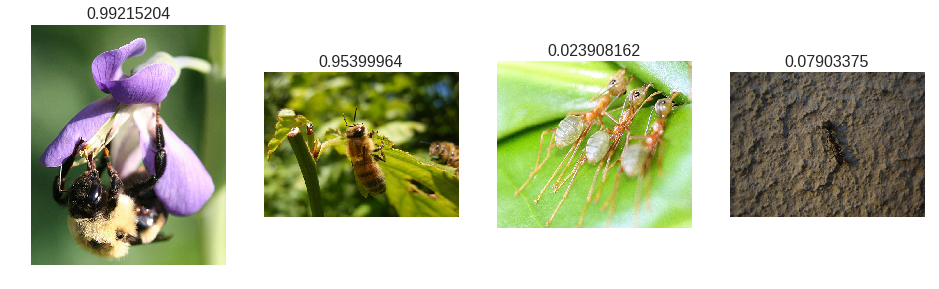

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


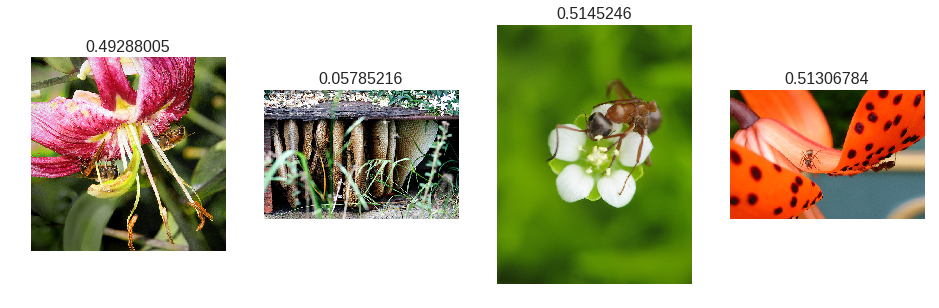

In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct Ants


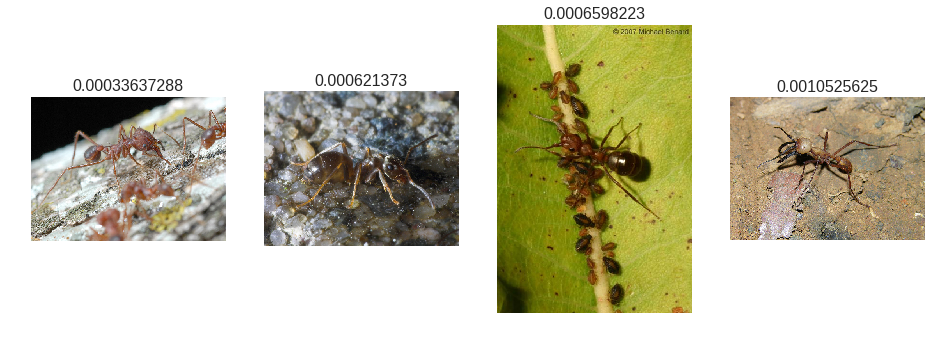

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct Ants")

Most correct bees


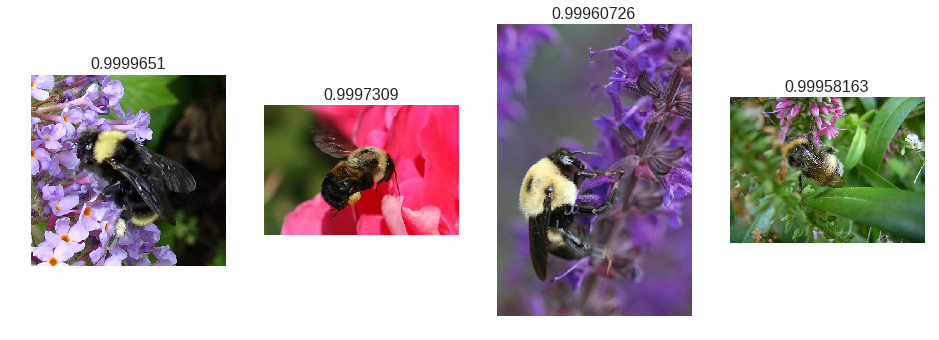

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct bees")

Most incorrect Ants


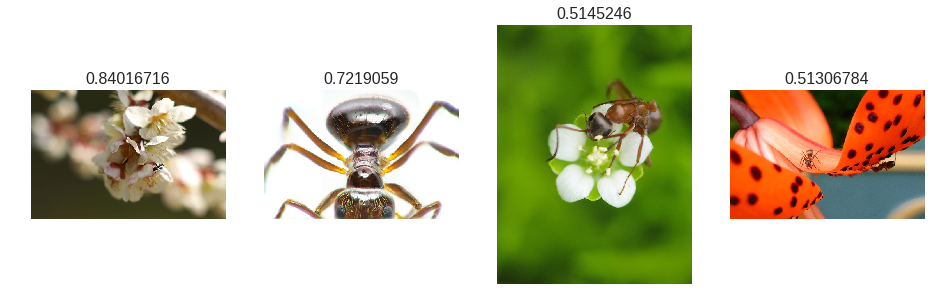

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect Ants")

Most incorrect bees


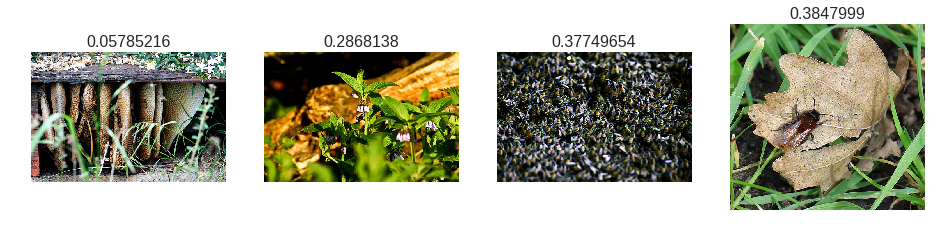

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect bees")

Most uncertain predictions


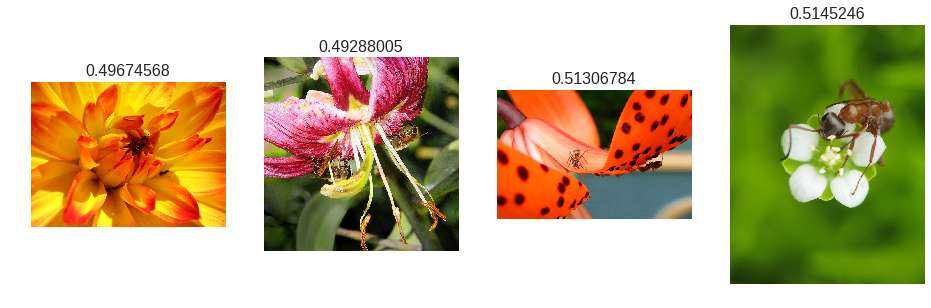

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      0.952092   0.246202   0.921569  



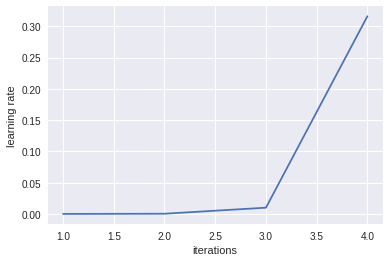

In [0]:
learn.sched.plot_lr()

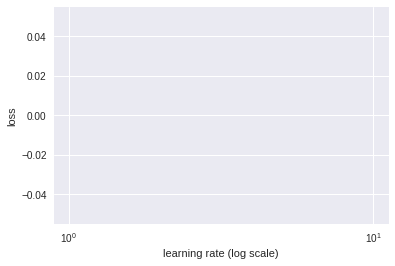

In [0]:
learn.sched.plot()

DATA WITH IMAGE NORMALIZATION 

In [0]:
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([0.24703,  0.24349,  0.26159]))

tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()])


tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

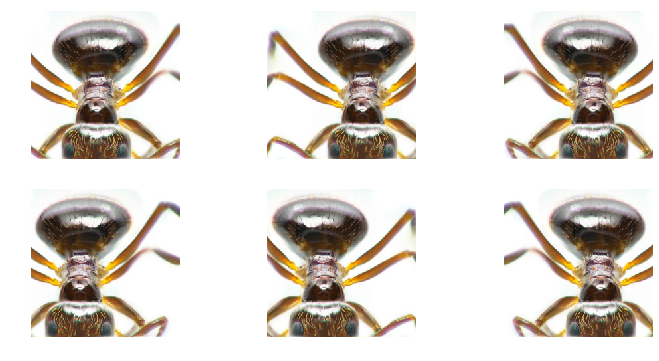

In [0]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      1.038701   0.120546   0.954248  



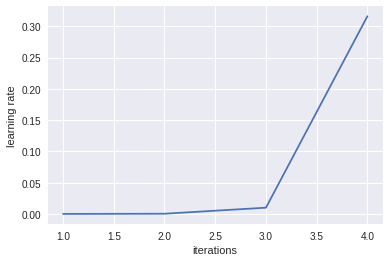

In [0]:
learn.sched.plot_lr()

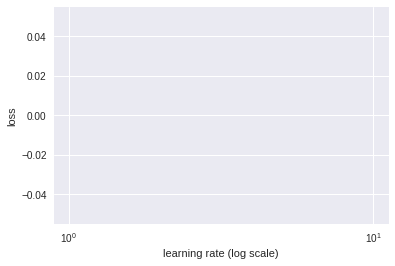

In [0]:
learn.sched.plot()

In [0]:
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.798101   0.709736   0.594771  
    1      0.538599   0.240731   0.901961  



[array([0.24073]), 0.9019607843137255]

In [0]:
learn.precompute=False

In [0]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.173042   0.175033   0.941176  
    1      0.169495   0.143166   0.947712  
    2      0.150181   0.123098   0.973856  



[array([0.1231]), 0.9738562056441712]

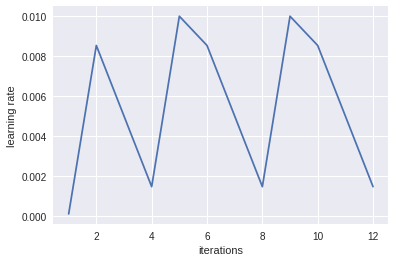

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [0]:
learn.unfreeze()

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.292499   0.126466   0.96732   
    1      0.263557   0.121185   0.96732   
    2      0.215699   0.129859   0.954248  
    3      0.19124    0.125811   0.960784  
    4      0.170352   0.129529   0.941176  
    5      0.150135   0.132284   0.934641  
    6      0.133236   0.136412   0.941176  



[array([0.13641]), 0.9411764733152452]

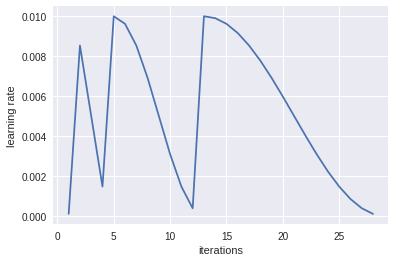

In [0]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [0]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [0]:
accuracy_np(probs, y)

0.9477124183006536

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[68  2]
 [ 6 77]]


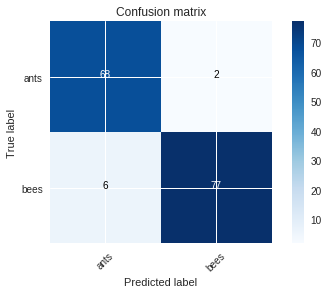

In [0]:
plot_confusion_matrix(cm, data.classes)

Most incorrect ants


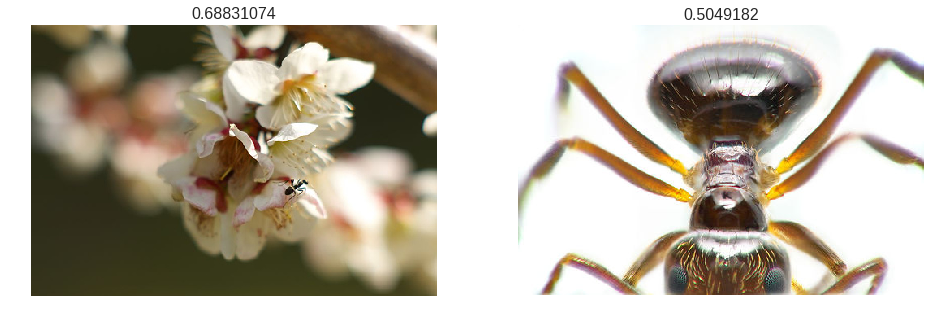

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect ants")

Most incorrect bees


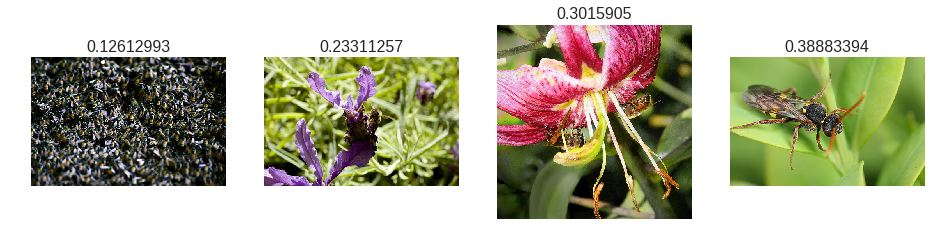

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect bees")